## Exploration of Water Quality Data for Austin, TX

See Readme for details.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wateratx = pd.read_csv('sandbox/Water_Quality_Sampling_Data.csv', low_memory=False)

In [3]:
wateratx.head(2)

,WATERSHED,SAMPLE_DATE,SITE_NAME,SITE_TYPE,MEDIUM,PARAM_TYPE,PARAMETER,QUALIFIER,RESULT,UNIT,...,METHOD,QC_FLAG,PROJECT,Location,DATA_REF_NO,LAT_DD_WGS84,LON_DD_WGS84,SAMPLE_REF_NO,TIME_NULL,QC_TYPE
0,Barton Creek,07/18/2013 02:25:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Fish,FISH,NaN,1.00,1=Present; 0=Absent,...,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.26358486, -97.76807574)",2227175,30.263585,-97.768076,440456,False,NaN
1,Barton Creek,07/18/2013 02:25:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Spatial,WATER DEPTH,NaN,31.87,Inches,...,MEASURING TAPE/RULER,U,Barton Springs Salamander,"(30.26358486, -97.76807574)",2227131,30.263585,-97.768076,440456,False,NaN


In [4]:
wateratx.tail(2)

,WATERSHED,SAMPLE_DATE,SITE_NAME,SITE_TYPE,MEDIUM,PARAM_TYPE,PARAMETER,QUALIFIER,RESULT,UNIT,...,METHOD,QC_FLAG,PROJECT,Location,DATA_REF_NO,LAT_DD_WGS84,LON_DD_WGS84,SAMPLE_REF_NO,TIME_NULL,QC_TYPE
1174555,Williamson Creek,03/16/1993 12:00:00 AM,Williamson Creek @ McKinney Falls (Will1),Stream,Surface Water,Solids/Conductivity,TOTAL SUSPENDED SOLIDS,NaN,0.8,MG/L,...,UNKNOWN,U,Water Quality Miscellaneous,"(30.188862909377, -97.7222983619912)",653009,30.188863,-97.722298,55118,True,NaN
1174556,Williamson Creek,03/16/1993 12:00:00 AM,Williamson Creek @ McKinney Falls (Will1),Stream,Surface Water,Solids/Conductivity,VOLATILE SUSPENDED SOLIDS,NaN,0.6,MG/L,...,UNKNOWN,U,Water Quality Miscellaneous,"(30.188862909377, -97.7222983619912)",653008,30.188863,-97.722298,55118,True,NaN


In [5]:
wateratx.shape

(1174557, 24)

For information on these features can be downloaded (pdf) [here](https://data.austintexas.gov/api/views/5tye-7ray/files/KtRsxGFDIvadsBKG4x5j9-qg56MXvotF5jOymfi_k6Y?download=true&filename=City%20of%20Austin%20Water%20Quality%20Sampling%20Data.pdf).

In [6]:
wateratx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174557 entries, 0 to 1174556
Data columns (total 24 columns):
WATERSHED          1174557 non-null object
SAMPLE_DATE        1174557 non-null object
SITE_NAME          1174557 non-null object
SITE_TYPE          1174557 non-null object
MEDIUM             1174557 non-null object
PARAM_TYPE         1174557 non-null object
PARAMETER          1174557 non-null object
QUALIFIER          150587 non-null object
RESULT             1174288 non-null float64
UNIT               1174557 non-null object
FILTER             1151202 non-null object
SAMPLE_ID          801366 non-null object
SAMPLE_SITE_NO     1174557 non-null int64
DEPTH_IN_METERS    133068 non-null float64
METHOD             1174557 non-null object
QC_FLAG            1163455 non-null object
PROJECT            1174557 non-null object
Location           990756 non-null object
DATA_REF_NO        1174557 non-null int64
LAT_DD_WGS84       990756 non-null float64
LON_DD_WGS84       990756 non-n

Missing data:
```
'QUALIFIER'
'RESULT'
'UNIT'
'FILTER'
'SAMPLE_ID'
'SAMPLE_SITE_NO'
'DEPTH_IN_METERS'
'QC_FLAG'
'Location'
'LAT_DD_WGS84'
'LON_DD_WGS84'
'QC_TYPE'
```

### Examining the values of features

**Unique values within each feature**

In [7]:
features = wateratx.columns

In [8]:
for feature in features:
    print("{:20s}: {:7} uniques".format(feature, wateratx[feature].nunique()))

WATERSHED           :      92 uniques
SAMPLE_DATE         :   38059 uniques
SITE_NAME           :    5002 uniques
SITE_TYPE           :      23 uniques
MEDIUM              :      34 uniques
PARAM_TYPE          :      96 uniques
PARAMETER           :    3088 uniques
QUALIFIER           :      40 uniques
RESULT              :   46776 uniques
UNIT                :     123 uniques
FILTER              :      23 uniques
SAMPLE_ID           :   36365 uniques
SAMPLE_SITE_NO      :    5002 uniques
DEPTH_IN_METERS     :    1105 uniques
METHOD              :     398 uniques
QC_FLAG             :       8 uniques
PROJECT             :     145 uniques
Location            :    2123 uniques
DATA_REF_NO         : 1174557 uniques
LAT_DD_WGS84        :    2120 uniques
LON_DD_WGS84        :    2114 uniques
SAMPLE_REF_NO       :  132701 uniques
TIME_NULL           :       2 uniques
QC_TYPE             :      11 uniques


**Watersheds:**

In [9]:
watersheds = wateratx["WATERSHED"].unique()
watersheds

array(['Barton Creek', 'Maha Creek', 'Hamilton Creek', 'Wilbarger Creek',
       'Bee Creek West', 'Decker Creek', 'Gilleland Creek',
       'Walnut Creek', 'Little Walnut Creek', 'Onion Creek',
       'Lake Austin', 'Little Bear Creek', 'Slaughter Creek',
       'Bear Creek', 'Taylor Slough North', 'Waller Creek',
       'Not Applicable', 'Blanco River', 'Dry Creek NE', 'Bull Creek',
       'Shoal Creek', 'Walter E. Long Lake', 'Lady Bird Lake',
       'Tannehill Branch', 'Davis Spring Branch', 'Williamson Creek',
       'Dry Creek North', 'Little Bee Creek', 'Taylor Slough South',
       'Carson Creek', 'Eanes Creek', 'South Boggy Creek',
       'East Bouldin Creek', "Harper's Branch", 'West Bouldin Creek',
       'Boggy Creek', 'Wells Branch', 'Bee Creek', 'Cow Fork Bull Creek',
       'Little Barton Creek', 'Harris Branch', 'Fort Branch',
       'West Bull Creek', 'Panther Hollow', 'Lick Creek',
       'Running Deer Creek', 'Bear Creek West', 'Big Sandy Creek',
       'Cow Creek', 

Each watershed has different sites where sampling is done.

In [10]:
sites = wateratx["SITE_NAME"].unique()

### Sites within watersheds

In [11]:
watershedsites = wateratx.groupby(['WATERSHED', 'SITE_NAME']).size().reset_index()
watershedsites.head()

,WATERSHED,SITE_NAME,0
0,Barton Creek,58-50-211 Travis Country Well,1
1,Barton Creek,Airmans River,33
2,Barton Creek,BAR @ Key West 10mRB,205
3,Barton Creek,BAR @ Key West 50mLB,130
4,Barton Creek,BAR @ Key West 90mRB,50


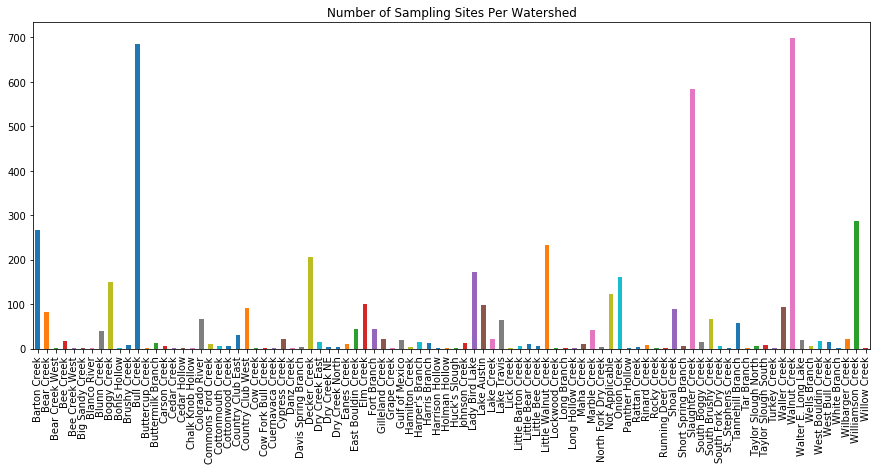

In [12]:
watershedsites.WATERSHED.value_counts().sort_index().plot(kind='bar',
                                                          title="Number of Sampling Sites Per Watershed", figsize=(15, 6));

#### Top 10 watersheds with the most sampling sites:

In [13]:
watershedsites.WATERSHED.value_counts().head(10)

Walnut Creek           699
Bull Creek             686
Slaughter Creek        585
Williamson Creek       286
Barton Creek           267
Little Walnut Creek    233
Decker Creek           207
Lady Bird Lake         172
Onion Creek            160
Boggy Creek            150
Name: WATERSHED, dtype: int64

### Site type

In [14]:
wateratx["SITE_TYPE"].unique()

array(['Spring', 'Stream', 'Non-spatial or Protected Location', 'Well',
       'Rural runoff', 'Rooftop', 'Lake', 'BMP-Drainage Swale', 'Soil',
       'BMP - Wet Pond', 'Sediment', 'Parking Lot', 'Storm Drain',
       'BMP - Inlet Filter', 'BMP - Detention Pond',
       'BMP - Sed. Filt. Basin', 'Urban runoff',
       'BMP - Oil Grit Separator', 'VIP Site',
       'BMP-Ret/Infiltration Pond', 'BMP-Sed. Filt. Basin Effl',
       'BMP-Sed. Filt. Basin Infl', 'BMP-Ret/Irrigation Pond'],
      dtype=object)

### Medium

In [15]:
wateratx["MEDIUM"].unique()

array(['Benthic Cover', 'Channel Assessment', 'Surface Water',
       'Ground Water', 'Sediment', 'Aesthetics',
       'Benthic Macroinvertebrate', 'Diatom', 'Habitat', 'Vegetation',
       'Sewage', 'Storm Water', 'Tap Water',
       'Treated Wastewater Effluent', 'Habitat Belt Transect', 'Soil',
       'Artificial', 'Pore Water', 'Plant Tissue', 'Fish Tissue',
       'Fish/Salamander', 'Pelagic Detritus',
       'Benthic Macroinvertebrate Tissue', 'Pelagic Particulate Matter',
       'Litter', 'Rain Water', 'Animal Waste', 'Pavement Sealer',
       'Water Standard', 'Asphalt', 'Leaf Pack', 'Fertilizer', 'Compost',
       'Cave Drips'], dtype=object)

### Param type

In [16]:
wateratx["PARAM_TYPE"].unique()

array(['Fish', 'Spatial', 'Grain Size/Substrate Characterization',
       'Physicals', 'Habitat Evaluation', 'Alkalinity/Hardness/pH',
       'Conventionals', 'Flow/Rainfall', 'Solids/Conductivity',
       'Major Ions', 'Nutrients', 'Metals', 'Bacteria/Pathogens',
       'Oxygen', 'Sample Collection Methods', 'Clarity',
       'Environmental Conditions', 'Benthic Macroinvertebrates',
       'Salamanders', 'Temporal', 'PAHs', 'Calculated Metrics',
       'Channel Assessment', 'Diatoms', 'Carbon', 'Hydrocarbons',
       'Organochlorines', 'PCBs', 'Sample Descriptors', 'Bivalve',
       'Alcohols', 'Amides', 'Benzoic acid', 'Carbamates', 'Chlorinated',
       'Emerging Contaminants', 'Fungicides', 'Insecticides', 'Organics',
       'Organophosphates', 'Semi-Volatiles', 'Triazines', 'Uracils',
       'Volatiles', 'Inorganics', 'Radiochemical',
       'Chlorophyll/Pheophytin', 'Isotope', 'Dinoflagellate',
       'Chlorophyte', 'Riparian Vegetation',
       'Disinfectants/Disinfection Byprod

### Parameter

In [25]:
parameters = wateratx['PARAMETER'].unique()

In [26]:
len(parameters)

3088

In [28]:
print(parameters)

['FISH' 'WATER DEPTH' 'CONCRETE' ... 'ABWR ABUTILON WRIGHTII'
 'COCA5 CONYZA CANADENSIS' 'PHVI17 PHYSALIS VISCOSA']


Parameters measured include biological, ecological and chemical data obtained from the different sites in the watersheds. Also, the data may pertain to a certain project, and parameters may be measured using different units.

The following is the number of parameters measured per parameter type:

In [18]:
wateratx.groupby(['PARAM_TYPE', 'PARAMETER']).size().reset_index().PARAM_TYPE.value_counts()

Diatoms                                  615
Benthic Macroinvertebrates               546
Habitat Evaluation                       246
Channel Assessment                       121
Riparian Vegetation                      114
Chlorophyte                               95
Grain Size/Substrate Characterization     95
Salamanders                               73
Semi-Volatiles                            63
Organics                                  62
Riparian Forbs                            57
Calculated Metrics                        50
PAHs                                      49
Riparian Tree - Small                     49
Cyanobacteria                             48
PCBs                                      47
Volatiles                                 42
Riparian Grasses                          41
Organochlorines                           38
Hydrocarbons                              37
Organophosphates                          34
Physicals                                 32
Bivalve   

In [30]:
parameter_types = wateratx.groupby(['PARAM_TYPE', 'PARAMETER']).size().reset_index()

In [96]:
len(parameter_types.PARAM_TYPE.unique())

96

In [37]:
parameter_types.PARAM_TYPE.unique()

array(['Alcohols', 'Algae (filamentous)', 'Algae (non-filamentous)',
       'Alkalinity/Hardness/pH', 'Amides', 'Amphibian', 'Aromatic Acids',
       'Bacteria/Pathogens', 'Benthic Macroinvertebrates', 'Benzoic acid',
       'Benzothiadiazoles', 'Biologicals', 'Bivalve',
       'Calculated Metrics', 'Carbamates', 'Carbon', 'Channel Assessment',
       'Charophyte', 'Chlorinated', 'Chlorophyll/Pheophytin',
       'Chlorophyte', 'Chrysophyte', 'Clarity', 'Conventionals',
       'Cryptophyte', 'Cyanobacteria', 'Defoliants',
       'Detergent Metabolites', 'Diatoms', 'Dinoflagellate',
       'Diphenolics', 'Disinfectants/Disinfection Byproducts',
       'Emerging Contaminants', 'Environmental Conditions',
       'Euglenophyte', 'Fertilizers', 'Fish', 'Flagellate Algae',
       'Flow/Rainfall', 'Fluorescent Tracers', 'Fungicides',
       'Grain Size/Substrate Characterization', 'Habitat Evaluation',
       'Haptophyte', 'Hydrocarbons', 'Inorganics', 'Insecticides',
       'Isotope', 'Major 

In [42]:
parameter_types[parameter_types['PARAM_TYPE'] == 'Bacteria/Pathogens']

,PARAM_TYPE,PARAMETER,0
34,Bacteria/Pathogens,E COLI BACTERIA,12603
35,Bacteria/Pathogens,ENTEROCOCCUS,11
36,Bacteria/Pathogens,FECAL COLIFORM BACTERIA,13500
37,Bacteria/Pathogens,FECAL STREPTOCOCCI,4110
38,Bacteria/Pathogens,HETEROTROPHIC PLATE COUNT,1
39,Bacteria/Pathogens,TOTAL COLIFORM BACTERIA,860


In [43]:
parameter_types[parameter_types['PARAM_TYPE'] == 'Alkalinity/Hardness/pH']

,PARAM_TYPE,PARAMETER,0
15,Alkalinity/Hardness/pH,24-HOUR AVG PH,346
16,Alkalinity/Hardness/pH,24-HOUR MAX PH,346
17,Alkalinity/Hardness/pH,24-HOUR MIN PH,346
18,Alkalinity/Hardness/pH,ALKALINITY (AS CACO3),4411
19,Alkalinity/Hardness/pH,ALKALINITY BICARBONATE (AS CACO3),281
20,Alkalinity/Hardness/pH,ALKALINITY CARBONATE (AS CACO3),276
21,Alkalinity/Hardness/pH,ALKALINITY HYDROXIDE (AS CACO3),255
22,Alkalinity/Hardness/pH,ALKALINITY PHENOLPHTHALEIN,7
23,Alkalinity/Hardness/pH,BICARBONATE (AS HCO3),9
24,Alkalinity/Hardness/pH,CALCIUM+MAGNESIUM HARDNESS (AS CACO3),1


In [44]:
parameter_types[parameter_types['PARAM_TYPE'] == 'Detergent Metabolites']

,PARAM_TYPE,PARAMETER,0
1003,Detergent Metabolites,OPTICAL BRIGHTENERS,17


In [45]:
parameter_types[parameter_types['PARAM_TYPE'] == 'Metals']

,PARAM_TYPE,PARAMETER,0
2114,Metals,ALUMINUM,732
2115,Metals,ANTIMONY,87
2116,Metals,ARSENIC,3223
2117,Metals,BARIUM,245
2118,Metals,BERYLLIUM,68
2119,Metals,BORON,729
2120,Metals,CADMIUM,1967
2121,Metals,CHROMIUM,1663
2122,Metals,COBALT,7
2123,Metals,COPPER,4471


In [46]:
parameter_types[parameter_types['PARAM_TYPE'] == 'Flow/Rainfall']

,PARAM_TYPE,PARAMETER,0
1685,Flow/Rainfall,BASEFLOW,369
1686,Flow/Rainfall,CUMULATIVE EVENT BASEFLOW,326
1687,Flow/Rainfall,CUMULATIVE EVENT RAINFALL,484
1688,Flow/Rainfall,CUMULATIVE EVENT RUNOFF,326
1689,Flow/Rainfall,DAYS AFTER STORM,3102
1690,Flow/Rainfall,FLOW,10298
1691,Flow/Rainfall,FLOW SEVERITY CODE (1=NONE;2=LOW;3=NORM;4=FLOO...,6622
1692,Flow/Rainfall,RAINFALL IN LAST 2 HOURS,326
1693,Flow/Rainfall,RAINFALL IN LAST 24 HOURS,42
1694,Flow/Rainfall,RAINFALL IN LAST 48 HOURS,42


In [47]:
parameter_types[parameter_types['PARAM_TYPE'] == 'Environmental Conditions']

,PARAM_TYPE,PARAMETER,0
1639,Environmental Conditions,24-HOUR AVG WATER TEMPERATURE,347
1640,Environmental Conditions,24-HOUR MAX WATER TEMPERATURE,347
1641,Environmental Conditions,24-HOUR MIN WATER TEMPERATURE,347
1642,Environmental Conditions,AIR TEMPERATURE,1540
1643,Environmental Conditions,BAROMETRIC PRESSURE,727
1644,Environmental Conditions,CARBON DIOXIDE (CO2) PRESSURE,552
1645,Environmental Conditions,DELTA-PRESSURE (TOTAL-BAROMETRIC),706
1646,Environmental Conditions,DISSOLVED GAS PRESSURE,712
1647,Environmental Conditions,GAS SATURATION,713
1648,Environmental Conditions,LIGHT INTENSITY,85


In [48]:
parameter_types[parameter_types['PARAM_TYPE'] == 'Survival/Toxicity Testing']

,PARAM_TYPE,PARAMETER,0
2997,Survival/Toxicity Testing,MICROTOX EC 20 (15) MINUTE,4
2998,Survival/Toxicity Testing,MICROTOX EC 20 (5 MINUTE),4
2999,Survival/Toxicity Testing,MICROTOX EC 50 (15 MINUTE),4
3000,Survival/Toxicity Testing,MICROTOX EC 50 (5 MINUTE),4


In [49]:
parameter_types[parameter_types['PARAM_TYPE'] == 'Benzothiadiazoles']

,PARAM_TYPE,PARAMETER,0
588,Benzothiadiazoles,BENTAZON,1


In [50]:
parameter_types[parameter_types['PARAM_TYPE'] == 'Organophosphates']

,PARAM_TYPE,PARAMETER,0
2264,Organophosphates,AZINPHOS (AZINPHOSETHYL),57
2265,Organophosphates,AZINPHOS METHYL (GUTHION),390
2266,Organophosphates,BOLSTAR (SULPROFOS),67
2267,Organophosphates,CHLORPYRIFOS (DURSBAN),398
2268,Organophosphates,CHLORPYRIFOS METHYL,55
2269,Organophosphates,COUMAPHOS (CO-RAL),104
2270,Organophosphates,DEMETON,340
2271,Organophosphates,DEMETON-O,248
2272,Organophosphates,DEMETON-O+S,13
2273,Organophosphates,DEMETON-S,246


In [93]:
parameter_types[parameter_types['PARAM_TYPE'] == 'Physicals']

,PARAM_TYPE,PARAMETER,0
2416,Physicals,ANGLE FROM PLOT CENTER,109
2417,Physicals,AREA SAMPLED,5102
2418,Physicals,BANK FULL WIDTH,149
2419,Physicals,CANOPY RADIUS E,97
2420,Physicals,CANOPY RADIUS N,97
2421,Physicals,CANOPY RADIUS S,97
2422,Physicals,CANOPY RADIUS W,98
2423,Physicals,DISTANCE FROM PLOT CENTER,109
2424,Physicals,DISTURBANCE EXTENT,55
2425,Physicals,DOWNSTREAM_PIN_DISTANCE,113


In [94]:
parameter_types[parameter_types['PARAM_TYPE'] == 'Organics']

,PARAM_TYPE,PARAMETER,0
2164,Organics,1-NAPHTHYLAMINE,202
2165,Organics,1_1-DICHLOROPROPENE,48
2166,Organics,1_2-DIBROMO-3-CHLOROPROPANE,98
2167,Organics,1_2-DICHLOROETHENE,49
2168,Organics,1_2_3-TRICHLOROBENZENE,99
2169,Organics,1_2_4-TRIMETHYLBENZENE,48
2170,Organics,1_3-DICHLOROPROPANE,48
2171,Organics,1_3-DICHLOROPROPENE,24
2172,Organics,1_3_5-TRIMETHYLBENZENE,48
2173,Organics,1_4-DIOXANE,8


### Qualifier

In [19]:
wateratx["QUALIFIER"].unique()

array([nan, '<J', 'J', '>', '<', 'A', 'JN', 'R', 'BJ', 'N', 'NS', 'B',
       'JA', 'HJ', 'H', 'HH', 'LE', '<JA', 'C', 'Z', 'CG', '>J', '~', 'I',
       'RH', 'JH', '<RJ', 'JC', 'SE', 'E', '<JN', 'INS', 'INF', 'ES', 'T',
       'E1', 'S', '<R', '>R', 'TJ', 'TH'], dtype=object)

In [20]:
wateratx.QUALIFIER.value_counts()

<      79936
<J     55120
J       7847
>       3394
A       1848
N        698
R        576
T        228
JA       200
Z        108
C         96
I         70
INS       68
>J        60
LE        53
H         42
CG        34
NS        29
B         26
E         20
JN        20
E1        17
HJ        13
~         11
SE        10
RH        10
TH         8
<JN        7
<RJ        7
JH         6
<R         5
INF        5
ES         4
JC         2
BJ         2
<JA        2
HH         2
TJ         1
S          1
>R         1
Name: QUALIFIER, dtype: int64

### QC Flag

In [21]:
wateratx["QC_FLAG"].unique()

array(['U', 'J', 'R', 'S', '?', nan, 'B', 'u', 'Z'], dtype=object)

`'U' is usable
'J' is estimated
'R' is unusable
'S' is not explained
'?' is unknown, presumably
'B' not explained
'u' is probably 'U'
'Z' is not explained`

--> from accompanying explanation of data (see pdf from website)

In [22]:
wateratx.QC_FLAG.value_counts()

U    1059851
J      41444
R      38915
S      22401
?        822
Z         15
B          6
u          1
Name: QC_FLAG, dtype: int64

In [23]:
wateratx.QC_FLAG.value_counts(normalize=True)

U    9.109514e-01
J    3.562149e-02
R    3.344779e-02
S    1.925386e-02
?    7.065164e-04
Z    1.289263e-05
B    5.157054e-06
u    8.595090e-07
Name: QC_FLAG, dtype: float64

# *E. coli* data

Here I only look at the *E. coli* measurements throughout the years. One problem that came up was that E coli was measured using different methods, giving different units. Hence, they cannot be combined, unless I find a way to convert one to the other.

In [99]:
ecoli = wateratx[(wateratx.PARAMETER == "E COLI BACTERIA") & (wateratx.RESULT.notnull()) & 
                 (wateratx.Location.notnull()) & ((wateratx.QC_FLAG == 'U') | (wateratx.QC_FLAG == 'u')) &
                 (wateratx.QC_TYPE.isnull())]

In [100]:
ecoli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10302 entries, 28 to 1174371
Data columns (total 24 columns):
WATERSHED          10302 non-null object
SAMPLE_DATE        10302 non-null object
SITE_NAME          10302 non-null object
SITE_TYPE          10302 non-null object
MEDIUM             10302 non-null object
PARAM_TYPE         10302 non-null object
PARAMETER          10302 non-null object
QUALIFIER          750 non-null object
RESULT             10302 non-null float64
UNIT               10302 non-null object
FILTER             10302 non-null object
SAMPLE_ID          7833 non-null object
SAMPLE_SITE_NO     10302 non-null int64
DEPTH_IN_METERS    351 non-null float64
METHOD             10302 non-null object
QC_FLAG            10302 non-null object
PROJECT            10302 non-null object
Location           10302 non-null object
DATA_REF_NO        10302 non-null int64
LAT_DD_WGS84       10302 non-null float64
LON_DD_WGS84       10302 non-null float64
SAMPLE_REF_NO      10302 non-n

In [101]:
ecoli.head()

,WATERSHED,SAMPLE_DATE,SITE_NAME,SITE_TYPE,MEDIUM,PARAM_TYPE,PARAMETER,QUALIFIER,RESULT,UNIT,...,METHOD,QC_FLAG,PROJECT,Location,DATA_REF_NO,LAT_DD_WGS84,LON_DD_WGS84,SAMPLE_REF_NO,TIME_NULL,QC_TYPE
28,Maha Creek,01/10/2017 11:30:00 AM,Maha Creek @ Maha Loop E of Creedmoor,Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,191.8,MPN/100ML,...,COLILERT (IDEXX METHOD),U,Environmental Integrity Index (EII),"(30.08638333, -97.67179167)",2562808,30.086383,-97.671792,514498,False,NaN
29,Wilbarger Creek,01/10/2017 08:45:00 AM,Wilbarger at Gregg Ln,Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,52.8,MPN/100ML,...,COLILERT (IDEXX METHOD),U,Environmental Integrity Index (EII),"(30.3814127460712, -97.5408074420628)",2562810,30.381413,-97.540807,514499,False,NaN
30,Wilbarger Creek,01/10/2017 09:30:00 AM,Wilbarger Creek Upstream of Bitting School Road,Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,55.4,MPN/100ML,...,COLILERT (IDEXX METHOD),U,Environmental Integrity Index (EII),"(30.309147250873, -97.4531772732303)",2562811,30.309147,-97.453177,514500,False,NaN
31,Bee Creek West,01/11/2017 09:30:00 AM,Bee Creek W @ Bee Creek Rd W of Lakeway,Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,27.9,MPN/100ML,...,COLILERT (IDEXX METHOD),U,Environmental Integrity Index (EII),"(30.35466667, -98.04018889)",2562812,30.354667,-98.040189,514501,False,NaN
32,Hamilton Creek,01/11/2017 10:30:00 AM,Hamilton Creek upstream from Hamilton Pool,Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,198.9,MPN/100ML,...,COLILERT (IDEXX METHOD),U,Environmental Integrity Index (EII),"(30.34103889, -98.12736389)",2562813,30.341039,-98.127364,514502,False,NaN


### Subset of data with 'MPN/100ML' as unit:

In [102]:
mpn_ecoli = ecoli[ecoli.UNIT == "MPN/100ML"]

In [103]:
mpn_ecoli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5805 entries, 28 to 1174265
Data columns (total 24 columns):
WATERSHED          5805 non-null object
SAMPLE_DATE        5805 non-null object
SITE_NAME          5805 non-null object
SITE_TYPE          5805 non-null object
MEDIUM             5805 non-null object
PARAM_TYPE         5805 non-null object
PARAMETER          5805 non-null object
QUALIFIER          459 non-null object
RESULT             5805 non-null float64
UNIT               5805 non-null object
FILTER             5805 non-null object
SAMPLE_ID          3816 non-null object
SAMPLE_SITE_NO     5805 non-null int64
DEPTH_IN_METERS    289 non-null float64
METHOD             5805 non-null object
QC_FLAG            5805 non-null object
PROJECT            5805 non-null object
Location           5805 non-null object
DATA_REF_NO        5805 non-null int64
LAT_DD_WGS84       5805 non-null float64
LON_DD_WGS84       5805 non-null float64
SAMPLE_REF_NO      5805 non-null int64
TIME_NULL 

### Mean E. coli levels in watersheds

In [57]:
mean_ecoli_levels_per_watershed = ecoli.RESULT.groupby([ecoli.WATERSHED, ecoli.UNIT, ecoli.MEDIUM]).mean()

In [58]:
mean_ecoli_levels_per_watershed = mean_ecoli_levels_per_watershed.unstack("UNIT")

In [59]:
mean_ecoli_levels_per_watershed

UNIT                                              Colonies/100mL   MG/L  \
WATERSHED            MEDIUM                                               
Barton Creek         Ground Water                      40.658355    NaN   
                     Surface Water                     52.441390    NaN   
Bear Creek           Ground Water                      18.544444    NaN   
                     Storm Water                     6893.033333    NaN   
                     Surface Water                    324.128571    NaN   
Bear Creek West      Surface Water                    107.500000    NaN   
Bee Creek            Surface Water                     82.750000    NaN   
Bee Creek West       Surface Water                           NaN    NaN   
Big Sandy Creek      Surface Water                           NaN    NaN   
Blanco River         Surface Water                           NaN    NaN   
Blunn Creek          Surface Water                    212.000000  338.0   
Boggy Creek          Ground Water                            NaN    NaN   
                     Surface Water                   1468.000000    NaN   
Bohls Hollow         Ground Water                            NaN    NaN   
Brushy Creek         Ground Water                      73.733333    NaN   
Bull Creek           Ground Water                     105.705882    NaN   
                     Sediment                                NaN    NaN   
                     Surface Water                    337.058990    NaN   
Buttermilk Branch    Surface Water                   1405.000000    NaN   
Carson Creek         Surface Water                           NaN    NaN   
Cedar Hollow         Ground Water                            NaN    NaN   
Commons Ford Creek   Surface Water                           NaN    NaN   
Cottonmouth Creek    Surface Water                           NaN    NaN   
Country Club East    Surface Water                    182.000000    NaN   
Country Club West    Surface Water                    182.000000    NaN   
Cow Creek            Surface Water                           NaN    NaN   
Cuernavaca Creek     Surface Water                           NaN    NaN   
Cypress Creek        Ground Water                            NaN    NaN   
Davis Spring Branch  Surface Water                    137.000000    NaN   
Decker Creek         Surface Water                     10.000000    NaN   
...                                                          ...    ...   
Running Deer Creek   Surface Water                           NaN    NaN   
Shoal Creek          Ground Water                      11.000000    NaN   
                     Surface Water                    720.000000    NaN   
Short Spring Branch  Ground Water                            NaN    NaN   
                     Surface Water                           NaN    NaN   
Slaughter Creek      Ground Water                       6.200000    NaN   
                     Storm Water                     2419.600000    NaN   
                     Surface Water                     30.000000    NaN   
South Boggy Creek    Surface Water                           NaN    NaN   
South Fork Dry Creek Surface Water                           NaN    NaN   
Tannehill Branch     Ground Water                            NaN    NaN   
                     Surface Water                    218.000000    NaN   
                     Treated Wastewater Effluent             NaN    NaN   
Taylor Slough North  Surface Water                           NaN    NaN   
Taylor Slough South  Surface Water                           NaN    NaN   
Turkey Creek         Surface Water                           NaN    NaN   
Waller Creek         Surface Water                    363.333333    NaN   
Walnut Creek         Ground Water                     166.400000    NaN   
                     Storm Water                     2420.000000    NaN   
                     Surface Water                    397.812500    NaN   
Walter E. Long Lake  Surf

In [60]:
mean_ecoli_levels_per_watershed.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 92 entries, (Barton Creek, Ground Water) to (Williamson Creek, Treated Wastewater Effluent)
Data columns (total 3 columns):
Colonies/100mL    46 non-null float64
MG/L              1 non-null float64
MPN/100ML         88 non-null float64
dtypes: float64(3)
memory usage: 3.0+ KB


### E coli levels time series

#### Setting the index to be the "SAMPLE_DATE"

In [104]:
ecoli = ecoli.set_index("SAMPLE_DATE")

#### Converting the sample date to DatetimeIndex:

In [105]:
ecoli.index = pd.to_datetime(ecoli.index)

In [106]:
type(ecoli.index)

pandas.core.indexes.datetimes.DatetimeIndex

## *E coli* in Bull Creek

In [107]:
bull_creek = ecoli[ecoli.WATERSHED == "Bull Creek"]

In [108]:
bull_creek.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1661 entries, 2014-09-10 13:27:00 to 2017-07-13 10:45:00
Data columns (total 23 columns):
WATERSHED          1661 non-null object
SITE_NAME          1661 non-null object
SITE_TYPE          1661 non-null object
MEDIUM             1661 non-null object
PARAM_TYPE         1661 non-null object
PARAMETER          1661 non-null object
QUALIFIER          65 non-null object
RESULT             1661 non-null float64
UNIT               1661 non-null object
FILTER             1661 non-null object
SAMPLE_ID          1139 non-null object
SAMPLE_SITE_NO     1661 non-null int64
DEPTH_IN_METERS    48 non-null float64
METHOD             1661 non-null object
QC_FLAG            1661 non-null object
PROJECT            1661 non-null object
Location           1661 non-null object
DATA_REF_NO        1661 non-null int64
LAT_DD_WGS84       1661 non-null float64
LON_DD_WGS84       1661 non-null float64
SAMPLE_REF_NO      1661 non-null int64
TIME_NULL          1

Checking the values of the features

In [66]:
bull_creek.QUALIFIER.unique()

array([nan, '>', '<', 'R', '<J'], dtype=object)

In [67]:
bull_creek.FILTER.unique()

array(['Total'], dtype=object)

In [68]:
bull_creek.DEPTH_IN_METERS.unique()

array([ nan, 0.2 , 0.02, 1.  ])

In [69]:
bull_creek.METHOD.unique()

array(['SM 9223 B', 'COLILERT (IDEXX METHOD)', 'UNKNOWN', 'SM 9222 G',
       'SM 9222 D', 'SM 9213D'], dtype=object)

In [70]:
bull_creek.PROJECT.unique()

array(['Environmental Integrity Index (EII)', 'Emergency Investigation',
       'Bull Creek Contact Rec Assessment',
       'Bull Creek Sediment Bacteria Study', 'Golf Course Springs',
       'Avery/Canyon Creek Groundwater', 'Bull Creek Study',
       'Atrazine Grant', 'Water Quality Miscellaneous',
       'WTP #4 Groundwater', 'WTP #4 Surface Water',
       'Sewage Spill Impacts Study',
       'Jollyville Transmission Main Monitoring',
       'Jollyville WQ and Salamander Assessment'], dtype=object)

In [71]:
bull_creek.UNIT.unique()

array(['MPN/100ML', 'Colonies/100mL'], dtype=object)

In [72]:
bull_creek.SITE_NAME.value_counts()

Bull Creek @ Loop 360 First Crossing                  530
Bull Creek @ Bull Creek Dist Park (Lakewood Dr)       449
Bull Creek 375 ft Upstream of Lakewood Drive           97
Bull Creek  Upstream of Tributary 7 (Franklin)         82
Bull Creek @ Spicewood Springs Crossing 1              46
Bull Creek @ St. Edwards Park Upstream of dam          40
Bull Creek 600 ft Upstream of Lakewood Drive           40
Bull Creek 90 ft Upstream of Lakewood Drive            37
Bull Creek 570 ft Upstream of Lakewood Drive           37
Bull Creek 140 ft Upstream of Lakewood Drive           36
Tributary 6 @ Bull Creek (EG)                          33
Bull Creek Trib 2 Upstream of Stillhouse Trib (EI)     30
Tributary 5 ds Hanks Tract Property Line               30
Bull Creek 100 ft Upstream of Loop 360 (S xing)        21
Bull Creek @ St. Edwards Park                          15
Canyon Creek Spring 1 (Tubb Spring)                    11
Fern Gully Spring                                      10
Bull Creek Ups

### Bull Creek site: Bull Creek Upstream of Tributary 7 (Franklin)

In [113]:
bullcreek_franklin = bull_creek[bull_creek.SITE_NAME == 'Bull Creek  Upstream of Tributary 7 (Franklin)']

In [114]:
bullcreek_franklin

,WATERSHED,SITE_NAME,SITE_TYPE,MEDIUM,PARAM_TYPE,PARAMETER,QUALIFIER,RESULT,UNIT,FILTER,...,METHOD,QC_FLAG,PROJECT,Location,DATA_REF_NO,LAT_DD_WGS84,LON_DD_WGS84,SAMPLE_REF_NO,TIME_NULL,QC_TYPE
SAMPLE_DATE,,,,,,,,,,,,,,,,,,,,,
2014-09-10 12:07:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,21.60,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",2383352,30.419009,-97.812697,473168,False,NaN
2014-07-02 12:45:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,35.50,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",2384246,30.419009,-97.812697,473189,False,NaN
2014-04-17 14:28:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,172.00,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",2307296,30.419009,-97.812697,448062,False,NaN
2014-01-15 14:10:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,7.40,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",2298948,30.419009,-97.812697,447624,False,NaN
2012-09-12 12:45:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,14.00,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",1961176,30.419009,-97.812697,387108,False,NaN
2012-07-05 14:00:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,84.00,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",1944004,30.419009,-97.812697,385839,False,NaN
2012-03-27 10:40:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Sediment,Bacteria/Pathogens,E COLI BACTERIA,NaN,172.30,MPN/100ML,Total,...,COLILERT (IDEXX METHOD),U,Bull Creek Sediment Bacteria Study,"(30.4190091731392, -97.8126968833023)",2408306,30.419009,-97.812697,478643,False,NaN
2012-03-27 10:40:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Sediment,Bacteria/Pathogens,E COLI BACTERIA,NaN,186.00,MPN/100ML,Total,...,COLILERT (IDEXX METHOD),U,Bull Creek Sediment Bacteria Study,"(30.4190091731392, -97.8126968833023)",2408310,30.419009,-97.812697,478642,False,NaN
2012-03-27 10:40:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Sediment,Bacteria/Pathogens,E COLI BACTERIA,NaN,228.20,MPN/100ML,Total,...,COLILERT (IDEXX METHOD),U,Bull Creek Sediment Bacteria Study,"(30.4190091731392, -97.8126968833023)",2408308,30.419009,-97.812697,478641,False,NaN


Only MPN/100ML

In [118]:
bullcreek_franklin = bullcreek_franklin[bullcreek_franklin['UNIT'] == 'MPN/100ML']

In [119]:
len(bullcreek_franklin)

76

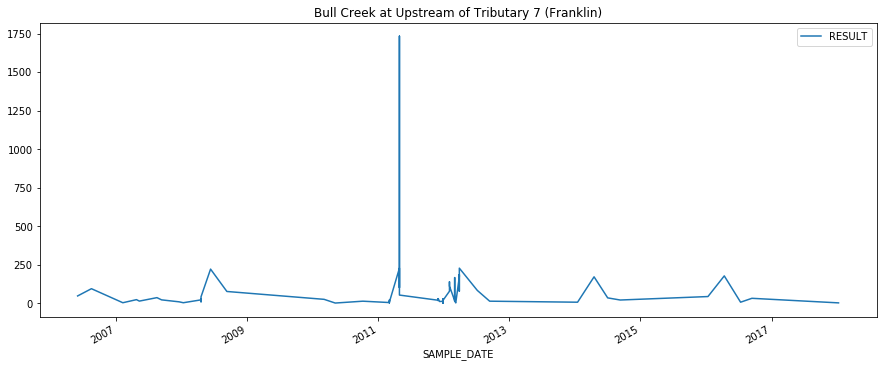

In [120]:
bullcreek_franklin.RESULT.plot(legend='best', figsize=(15,6), title='Bull Creek at Upstream of Tributary 7 (Franklin)')

In [122]:
bullcreek_franklin.groupby('SAMPLE_DATE').mean()

,RESULT,SAMPLE_SITE_NO,DEPTH_IN_METERS,DATA_REF_NO,LAT_DD_WGS84,LON_DD_WGS84,SAMPLE_REF_NO,TIME_NULL
SAMPLE_DATE,,,,,,,,
2006-05-30 09:13:00,48.000000,349.0,NaN,1.372419e+06,30.419009,-97.812697,295094.0,False
2006-08-15 10:15:00,95.000000,349.0,NaN,1.397441e+06,30.419009,-97.812697,299029.0,False
2007-02-06 11:00:00,4.000000,349.0,NaN,1.428918e+06,30.419009,-97.812697,315527.0,False
2007-04-23 12:30:00,24.000000,349.0,NaN,1.450267e+06,30.419009,-97.812697,304207.0,False
2007-05-09 13:00:00,14.600000,349.0,NaN,1.444187e+06,30.419009,-97.812697,304415.0,False
2007-08-15 12:30:00,37.000000,349.0,NaN,1.470192e+06,30.419009,-97.812697,307373.0,False
2007-09-10 11:45:00,22.600000,349.0,NaN,1.457180e+06,30.419009,-97.812697,307569.0,False
2007-12-17 13:10:00,9.800000,349.0,NaN,1.489840e+06,30.419009,-97.812697,313199.0,False
2008-01-09 12:50:00,4.000000,349.0,NaN,1.505795e+06,30.419009,-97.812697,313730.0,False


### Bull Creek site: Bull Creek @ Loop 360 First Crossing

In [131]:
def get_site(site):
    bullcreek_site = bull_creek[(bull_creek.SITE_NAME == site) & (bull_creek.UNIT == 'MPN/100ML')]
    return bullcreek_site

In [132]:
get_site('Bull Creek  Upstream of Tributary 7 (Franklin)')

,WATERSHED,SITE_NAME,SITE_TYPE,MEDIUM,PARAM_TYPE,PARAMETER,QUALIFIER,RESULT,UNIT,FILTER,...,METHOD,QC_FLAG,PROJECT,Location,DATA_REF_NO,LAT_DD_WGS84,LON_DD_WGS84,SAMPLE_REF_NO,TIME_NULL,QC_TYPE
SAMPLE_DATE,,,,,,,,,,,,,,,,,,,,,
2014-09-10 12:07:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,21.60,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",2383352,30.419009,-97.812697,473168,False,NaN
2014-07-02 12:45:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,35.50,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",2384246,30.419009,-97.812697,473189,False,NaN
2014-04-17 14:28:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,172.00,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",2307296,30.419009,-97.812697,448062,False,NaN
2014-01-15 14:10:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,7.40,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",2298948,30.419009,-97.812697,447624,False,NaN
2012-09-12 12:45:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,14.00,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",1961176,30.419009,-97.812697,387108,False,NaN
2012-07-05 14:00:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,84.00,MPN/100ML,Total,...,SM 9223 B,U,Environmental Integrity Index (EII),"(30.4190091731392, -97.8126968833023)",1944004,30.419009,-97.812697,385839,False,NaN
2012-03-27 10:40:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Sediment,Bacteria/Pathogens,E COLI BACTERIA,NaN,172.30,MPN/100ML,Total,...,COLILERT (IDEXX METHOD),U,Bull Creek Sediment Bacteria Study,"(30.4190091731392, -97.8126968833023)",2408306,30.419009,-97.812697,478643,False,NaN
2012-03-27 10:40:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Sediment,Bacteria/Pathogens,E COLI BACTERIA,NaN,186.00,MPN/100ML,Total,...,COLILERT (IDEXX METHOD),U,Bull Creek Sediment Bacteria Study,"(30.4190091731392, -97.8126968833023)",2408310,30.419009,-97.812697,478642,False,NaN
2012-03-27 10:40:00,Bull Creek,Bull Creek Upstream of Tributary 7 (Franklin),Stream,Sediment,Bacteria/Pathogens,E COLI BACTERIA,NaN,228.20,MPN/100ML,Total,...,COLILERT (IDEXX METHOD),U,Bull Creek Sediment Bacteria Study,"(30.4190091731392, -97.8126968833023)",2408308,30.419009,-97.812697,478641,False,NaN


In [133]:
bullcreek_loop360 = get_site('Bull Creek @ Loop 360 First Crossing')

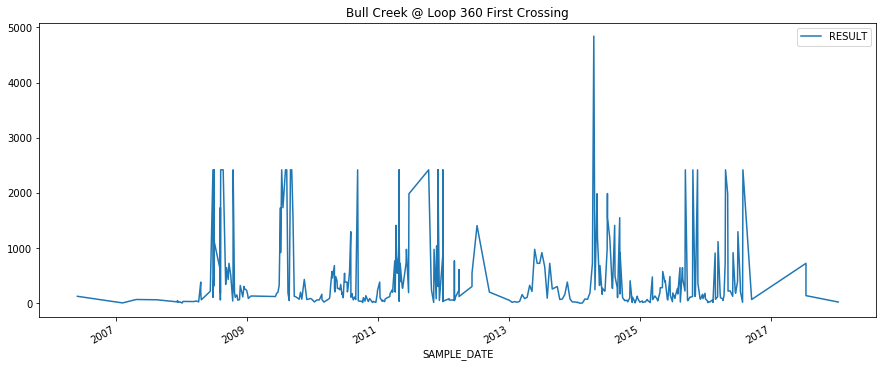

In [134]:
bullcreek_loop360.RESULT.plot(legend='best', figsize=(15,6), title='Bull Creek @ Loop 360 First Crossing')

## Bull Creek @ St. Edwards Park Upstream of dam

In [135]:
bullcreek_stedwardsupstream = get_site('Bull Creek @ St. Edwards Park Upstream of dam')

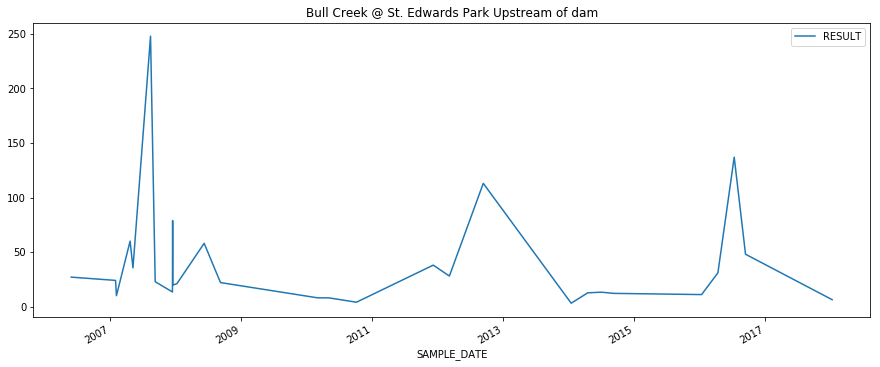

In [136]:
bullcreek_stedwardsupstream.RESULT.plot(legend='best', figsize=(15,6), title='Bull Creek @ St. Edwards Park Upstream of dam')

## Tributary 6 @ Bull Creek (EG)

In [137]:
bullcreek_tributary6 = get_site('Tributary 6 @ Bull Creek (EG)')

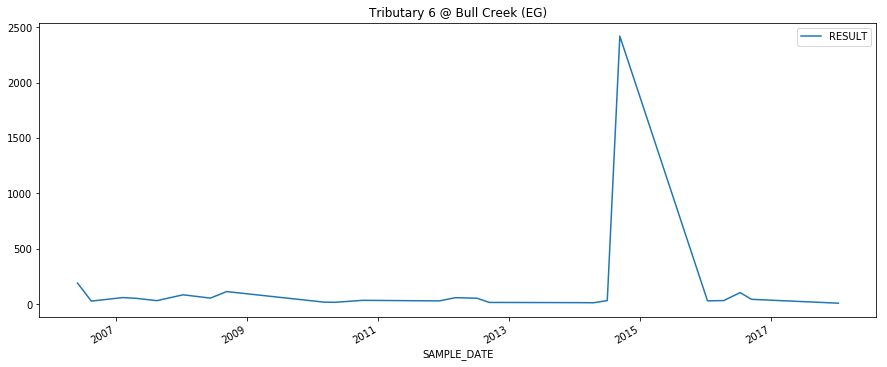

In [140]:
bullcreek_tributary6.RESULT.plot(legend='best', figsize=(15,6), title='Tributary 6 @ Bull Creek (EG)')

## Tributary 5 ds Hanks Tract Property Line

In [145]:
bullcreek_tributary5 = get_site('Tributary 5 ds Hanks Tract Property Line')

In [146]:
type(bullcreek_tributary5)

pandas.core.frame.DataFrame

In [153]:
bullcreek_tributary5_df = bullcreek_tributary5.RESULT.to_frame()

In [157]:
bullcreek_tributary5_df= bullcreek_tributary5_df.reset_index()

In [158]:
bullcreek_tributary5_df

,SAMPLE_DATE,RESULT
0,2014-09-10 11:30:00,105.0
1,2014-07-02 11:15:00,387.0
2,2014-04-17 13:35:00,260.0
3,2014-01-15 13:00:00,17.5
4,2012-09-12 11:45:00,18.0
5,2012-07-05 13:00:00,98.0
6,2012-03-07 12:35:00,89.0
7,2011-12-08 13:00:00,65.0
8,2010-05-05 12:45:00,23.0
9,2010-03-04 12:00:00,20.0


In [163]:
bullcreek_tributary5_df['date'] = pd.to_timedelta(bullcreek_tributary5_df['SAMPLE_DATE']).dt.total_seconds().astype(int)

In [164]:
bullcreek_tributary5_df

,SAMPLE_DATE,RESULT,date
0,2014-09-10 11:30:00,105.0,1410348600
1,2014-07-02 11:15:00,387.0,1404299700
2,2014-04-17 13:35:00,260.0,1397741700
3,2014-01-15 13:00:00,17.5,1389790800
4,2012-09-12 11:45:00,18.0,1347450300
5,2012-07-05 13:00:00,98.0,1341493200
6,2012-03-07 12:35:00,89.0,1331123700
7,2011-12-08 13:00:00,65.0,1323349200
8,2010-05-05 12:45:00,23.0,1273063500
9,2010-03-04 12:00:00,20.0,1267704000


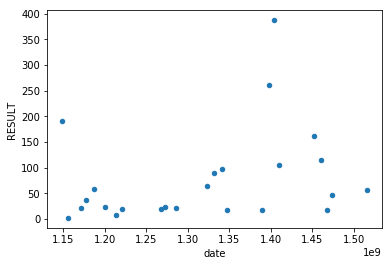

In [165]:
bullcreek_tributary5_df.plot(kind='scatter', x='date', y='RESULT')

### Time series analysis of E. coli in Bull Creek @ Loop 360 First Crossing

In [80]:
bull_creek1 = bull_creek[bull_creek.SITE_NAME == "Bull Creek @ Loop 360 First Crossing"]

UNIT
Colonies/100mL    AxesSubplot(0.125,0.2;0.775x0.68)
MPN/100ML         AxesSubplot(0.125,0.2;0.775x0.68)
Name: RESULT, dtype: object

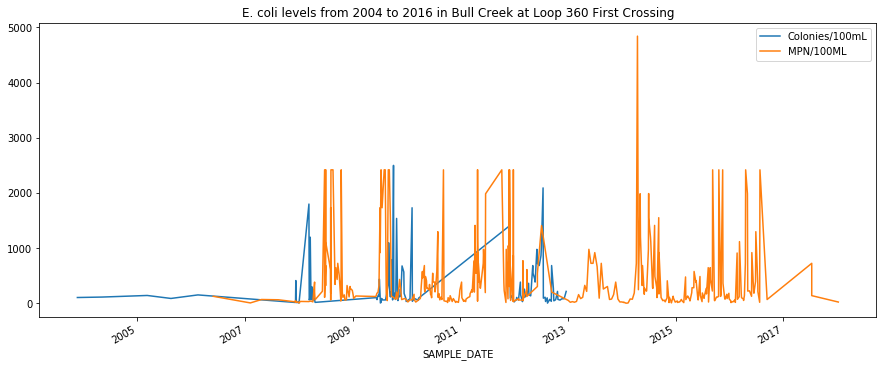

In [81]:
bull_creek1.RESULT.groupby([bull_creek1.UNIT]).plot(legend='best', figsize=(15,6), title='E. coli levels from 2004 to 2016 in Bull Creek at Loop 360 First Crossing')

For some reason, they have stopped using Colonies/100mL as unit and just used MPN/100mL. What method did they end up using?

In [82]:
bull_creek1[bull_creek1.UNIT == 'MPN/100ML'].METHOD.unique()

array(['SM 9223 B', 'COLILERT (IDEXX METHOD)'], dtype=object)

In [83]:
bull_creek1[bull_creek1.UNIT == 'MPN/100ML'].sort_index()[["METHOD", "UNIT"]].tail(10)

,METHOD,UNIT
SAMPLE_DATE,,
2016-06-27 00:00:00,SM 9223 B,MPN/100ML
2016-06-29 00:00:00,SM 9223 B,MPN/100ML
2016-07-12 12:35:00,SM 9223 B,MPN/100ML
2016-07-13 00:00:00,SM 9223 B,MPN/100ML
2016-07-25 00:00:00,SM 9223 B,MPN/100ML
2016-07-27 00:00:00,SM 9223 B,MPN/100ML
2016-09-13 14:10:00,SM 9223 B,MPN/100ML
2017-07-13 10:30:00,COLILERT (IDEXX METHOD),MPN/100ML
2017-07-13 10:35:00,COLILERT (IDEXX METHOD),MPN/100ML


SM 9223 B is the standard method from EPA. (need confirmation of this)

In [84]:
bull_creek_mpn = bull_creek1[bull_creek1.UNIT == 'MPN/100ML']

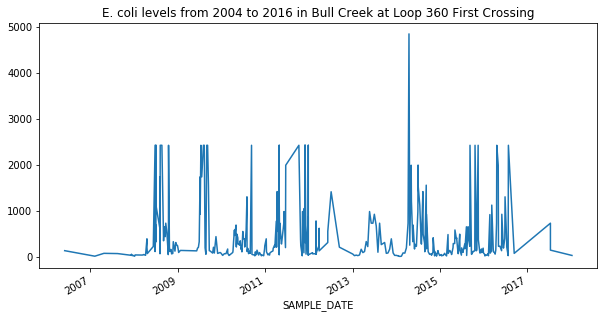

In [85]:
bull_creek_mpn.RESULT.plot(title='E. coli levels from 2004 to 2016 in Bull Creek at Loop 360 First Crossing', figsize=(10,5));

### Location of Sites in Bull Creek

In [86]:
bull_creek.columns

Index(['WATERSHED', 'SITE_NAME', 'SITE_TYPE', 'MEDIUM', 'PARAM_TYPE',
       'PARAMETER', 'QUALIFIER', 'RESULT', 'UNIT', 'FILTER', 'SAMPLE_ID',
       'SAMPLE_SITE_NO', 'DEPTH_IN_METERS', 'METHOD', 'QC_FLAG', 'PROJECT',
       'Location', 'DATA_REF_NO', 'LAT_DD_WGS84', 'LON_DD_WGS84',
       'SAMPLE_REF_NO', 'TIME_NULL', 'QC_TYPE'],
      dtype='object')

In [87]:
bull_creek_loc = bull_creek.groupby(["SITE_NAME", "LAT_DD_WGS84",
       "LON_DD_WGS84"]).size().reset_index()

In [88]:
bull_creek_loc

,SITE_NAME,LAT_DD_WGS84,LON_DD_WGS84,0
0,At Spill on Stillhouse Tributary,30.376427,-97.766911,5
1,Below Spill on Stillhouse Tributary,30.379344,-97.767699,5
2,Bull Creek Upstream of Tributary 7 (Franklin),30.419009,-97.812697,82
3,Bull Creek 100 ft Upstream of Loop 360 (S xing),30.373010,-97.784663,21
4,Bull Creek 140 ft Upstream of Lakewood Drive,30.366358,-97.786504,36
5,Bull Creek 1900 ft Upstream Loop 360 (south xing),30.377628,-97.783691,6
6,Bull Creek 375 ft Upstream of Lakewood Drive,30.366263,-97.785723,97
7,Bull Creek 570 ft Upstream of Lakewood Drive,30.366443,-97.785385,37
8,Bull Creek 600 ft Upstream of Lakewood Drive,30.367002,-97.784999,40
9,Bull Creek 700 ft Downstream of Loop 360,30.370459,-97.785119,4


In [89]:
del bull_creek_loc[0]

In [90]:
bull_creek_loc

,SITE_NAME,LAT_DD_WGS84,LON_DD_WGS84
0,At Spill on Stillhouse Tributary,30.376427,-97.766911
1,Below Spill on Stillhouse Tributary,30.379344,-97.767699
2,Bull Creek Upstream of Tributary 7 (Franklin),30.419009,-97.812697
3,Bull Creek 100 ft Upstream of Loop 360 (S xing),30.373010,-97.784663
4,Bull Creek 140 ft Upstream of Lakewood Drive,30.366358,-97.786504
5,Bull Creek 1900 ft Upstream Loop 360 (south xing),30.377628,-97.783691
6,Bull Creek 375 ft Upstream of Lakewood Drive,30.366263,-97.785723
7,Bull Creek 570 ft Upstream of Lakewood Drive,30.366443,-97.785385
8,Bull Creek 600 ft Upstream of Lakewood Drive,30.367002,-97.784999
9,Bull Creek 700 ft Downstream of Loop 360,30.370459,-97.785119


In [91]:
ecoli.head(2)

,WATERSHED,SITE_NAME,SITE_TYPE,MEDIUM,PARAM_TYPE,PARAMETER,QUALIFIER,RESULT,UNIT,FILTER,...,METHOD,QC_FLAG,PROJECT,Location,DATA_REF_NO,LAT_DD_WGS84,LON_DD_WGS84,SAMPLE_REF_NO,TIME_NULL,QC_TYPE
SAMPLE_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-10 11:30:00,Maha Creek,Maha Creek @ Maha Loop E of Creedmoor,Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,191.8,MPN/100ML,Total,...,COLILERT (IDEXX METHOD),U,Environmental Integrity Index (EII),"(30.08638333, -97.67179167)",2562808,30.086383,-97.671792,514498,False,NaN
2017-01-10 08:45:00,Wilbarger Creek,Wilbarger at Gregg Ln,Stream,Surface Water,Bacteria/Pathogens,E COLI BACTERIA,NaN,52.8,MPN/100ML,Total,...,COLILERT (IDEXX METHOD),U,Environmental Integrity Index (EII),"(30.3814127460712, -97.5408074420628)",2562810,30.381413,-97.540807,514499,False,NaN


In [92]:
len(ecoli[ecoli.SITE_NAME =="Bull Creek @ Loop 360 First Crossing"])

530

## Fecal coliform bacteria

In [51]:
fcb = wateratx[(wateratx.PARAMETER == "FECAL COLIFORM BACTERIA") & (wateratx.RESULT.notnull()) & 
                 (wateratx.Location.notnull()) & ((wateratx.QC_FLAG == 'U') | (wateratx.QC_FLAG == 'u')) &
                 (wateratx.QC_TYPE.isnull())]

In [52]:
fcb

,WATERSHED,SAMPLE_DATE,SITE_NAME,SITE_TYPE,MEDIUM,PARAM_TYPE,PARAMETER,QUALIFIER,RESULT,UNIT,...,METHOD,QC_FLAG,PROJECT,Location,DATA_REF_NO,LAT_DD_WGS84,LON_DD_WGS84,SAMPLE_REF_NO,TIME_NULL,QC_TYPE
49854,Barton Creek,09/29/2008 12:00:00 AM,Barton Spring,Spring,Ground Water,Bacteria/Pathogens,FECAL COLIFORM BACTERIA,NaN,4.0,Colonies/100mL,...,SM 9222 D,U,Groundwater,"(30.2635351223695, -97.7709796798271)",1544029,30.263535,-97.770980,318323,True,NaN
49856,Barton Creek,09/29/2008 12:00:00 AM,Barton Spring Pool @ Downstream Dam,Stream,Ground Water,Bacteria/Pathogens,FECAL COLIFORM BACTERIA,NaN,2.0,Colonies/100mL,...,SM 9222 D,U,Groundwater,"(30.2640070647195, -97.7693825634433)",1544033,30.264007,-97.769383,318325,True,NaN
49858,Barton Creek,09/29/2008 12:00:00 AM,Barton Springs Pool @ Northern Steps (BS-S),Spring,Ground Water,Bacteria/Pathogens,FECAL COLIFORM BACTERIA,NaN,3.0,Colonies/100mL,...,SM 9222 D,U,Groundwater,"(30.2638664355279, -97.7707391937394)",1544031,30.263866,-97.770739,318324,True,NaN
50119,Barton Creek,09/24/2008 12:00:00 AM,Barton Spring,Spring,Ground Water,Bacteria/Pathogens,FECAL COLIFORM BACTERIA,NaN,12.0,Colonies/100mL,...,SM 9222 D,U,Groundwater,"(30.2635351223695, -97.7709796798271)",1544019,30.263535,-97.770980,318318,True,NaN
50121,Barton Creek,09/24/2008 12:00:00 AM,Barton Spring Pool @ Downstream Dam,Stream,Ground Water,Bacteria/Pathogens,FECAL COLIFORM BACTERIA,NaN,20.0,Colonies/100mL,...,SM 9222 D,U,Groundwater,"(30.2640070647195, -97.7693825634433)",1544025,30.264007,-97.769383,318320,True,NaN
50123,Barton Creek,09/24/2008 12:00:00 AM,Barton Springs Pool @ Northern Steps (BS-S),Spring,Ground Water,Bacteria/Pathogens,FECAL COLIFORM BACTERIA,NaN,2.0,Colonies/100mL,...,SM 9222 D,U,Groundwater,"(30.2638664355279, -97.7707391937394)",1544023,30.263866,-97.770739,318319,True,NaN
50781,Barton Creek,09/17/2008 12:00:00 AM,Barton Spring,Spring,Ground Water,Bacteria/Pathogens,FECAL COLIFORM BACTERIA,NaN,53.0,Colonies/100mL,...,SM 9222 D,U,Groundwater,"(30.2635351223695, -97.7709796798271)",1544011,30.263535,-97.770980,318313,True,NaN
51287,Barton Creek,09/15/2008 12:00:00 AM,Barton Spring,Spring,Ground Water,Bacteria/Pathogens,FECAL COLIFORM BACTERIA,NaN,6.0,Colonies/100mL,...,SM 9222 D,U,Groundwater,"(30.2635351223695, -97.7709796798271)",1544003,30.263535,-97.770980,318308,True,NaN
51289,Barton Creek,09/15/2008 12:00:00 AM,Barton Spring Pool @ Downstream Dam,Stream,Ground Water,Bacteria/Pathogens,FECAL COLIFORM BACTERIA,NaN,37.0,Colonies/100mL,...,SM 9222 D,U,Groundwater,"(30.2640070647195, -97.7693825634433)",1544007,30.264007,-97.769383,318310,True,NaN
51291,Barton Creek,09/15/2008 12:00:00 AM,Barton Springs Pool @ Northern Steps (BS-S),Spring,Ground Water,Bacteria/Pathogens,FECAL COLIFORM BACTERIA,NaN,7.0,Colonies/100mL,...,SM 9222 D,U,Groundwater,"(30.2638664355279, -97.7707391937394)",1544005,30.263866,-97.770739,318309,True,NaN
